## Problem Set #2
### MACS 30100, Dr. Evans
### Xi Chen

In [24]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.optimize as opt
import pandas as pd

### Q1. (a)

In [25]:
income = np.loadtxt('incomes.txt')

<IPython.core.display.Javascript object>


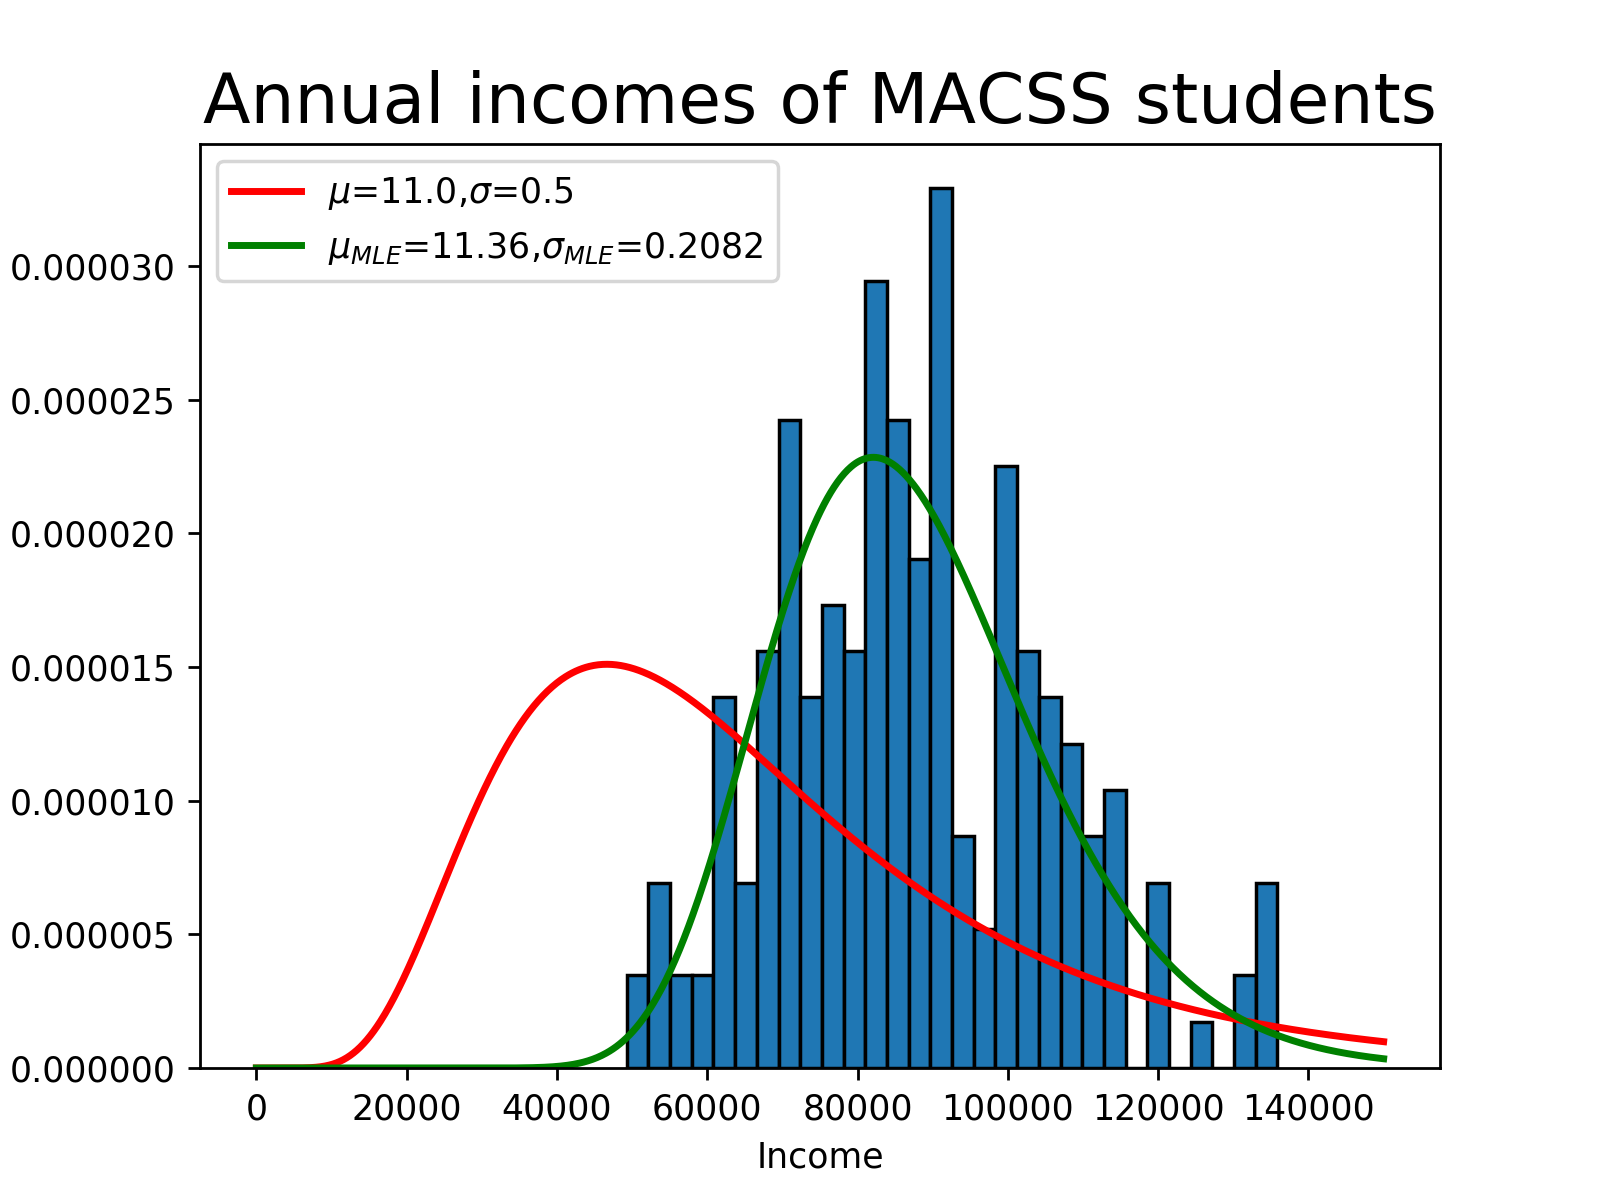

In [26]:
count, bins, ignored = plt.hist(income, 30, edgecolor='black', normed=True)
plt.title('Annual incomes of MACSS students', fontsize=20)
plt.xlabel('Income')
plt.ylabel('Percent of Incomes')

### Q1. (b)

In [27]:
# Define function that generates values of a Lognormal PDF
def lognorm_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the log normal pdf with mean mu and standard
    deviation sigma. 
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION: 
    lognorm_pdf_vals = (N,) vector, lognormal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: lognorm_pdf_vals
    --------------------------------------------------------------------
    '''
    
    lognorm_pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi)) 
                          * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    
    return lognorm_pdf_vals

For the following plot, please see the figure above.

In [28]:
# Plot the lognormal PDF f(x|µ = 11.0,σ = 0.5) for 0 ≤ x ≤ 150,000
mu = 11.0
sigma = 0.5
dist_pts = np.linspace(1e-100, 150000, 1000)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu, sigma),
         linewidth=2, color='r', label=r'$\mu$=11.0,$\sigma$=0.5')
plt.legend(loc='upper left')

In [29]:
# Define log likelihood function for the lognormal distribution
def log_lik_lognorm(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given lognormal
    distribution parameters mu and sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        lognorm_pdf()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, lognormal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of lognormal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [30]:
print("The value of the Log-likelihood for this parameterization is {}.".format(log_lik_lognorm(income, mu, sigma)))

The value of the Log-likelihood for this parameterization is -2385.856997808558.


### Q1. (c)

In [31]:
# Define the criterion function
def crit(params, args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the log normally distributed random variable
    sigma  = scalar > 0, standard deviation of the log normally distributed
             random variable
    args   = length 1 tuple, (xvals)
    xvals  = (N,) vector, values of the log normally distributed random
             variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [32]:
# Estimated the parameters of the lognormal distribution by ML
mu_init = 11.0 
sigma_init = 0.5  
params_init = np.array([mu_init, sigma_init])
mle_args = income
results = opt.minimize(crit, params_init, args=(mle_args), 
                       method='L-BFGS-B', bounds=((None,None),(1e-1,None)))
mu_MLE, sigma_MLE = results.x

# Report the ML estimates for mu and sigma
print('mu_MLE =', mu_MLE, 'sigma_MLE =', sigma_MLE)

mu_MLE = 11.3590244332 sigma_MLE = 0.208178546322


For the following plot, please see the figure above.

In [33]:
# Plot the MLE estimated PDF
dist_pts = np.linspace(1e-10, 150000, 1000)
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sigma_MLE),
         linewidth=2, color='g', label=r'$\mu_{MLE}$=11.36,$\sigma_{MLE}$=0.2082')
plt.legend(loc='upper left')

In [34]:
# Report the value of the likelihodd function
print('The value of the log likelihood function is {}.'.format(log_lik_lognorm(income, mu_MLE, sigma_MLE)))

The value of the log likelihood function is -2241.7193013689384.


In [35]:
# The variance-covariance matrix
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = OffDiagNeg * results.hess_inv.todense()
print('The variance-covariance matrix VCV(MLE) is \n', vcv_mle)

The variance-covariance matrix VCV(MLE) is 
 [[  2.52847936e-04  -2.76193937e-05]
 [ -2.76193937e-05   1.30452099e-04]]


### Q1. (d)

In [36]:
# Perform a likelihood ratio test
log_lik_h0 = log_lik_lognorm(income, mu, sigma)
log_lik_mle = log_lik_lognorm(income, mu_MLE, sigma_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {:.2f}'.format(pval_h0))

chi squared of H0 with 2 degrees of freedom p-value = 0.00


Therefore, h0 is rejected because the p-value is very small, and we can conclude that the data in the incomes.txt is unlikely to come from the distribution in part (b).

### Q1. (e)

In [37]:
P_100000 = 1 - sts.lognorm.cdf(100000, s=sigma_MLE, scale=np.exp(mu_MLE))
P_75000 = sts.lognorm.cdf(75000, s=sigma_MLE, scale=np.exp(mu_MLE))

print("The probability that MACSS stuents will earn more than $100,000 is {:.4f}.".format(P_100000))
print("The probability that MACSS stuents will earn less than $75,000 is {:.4f}.".format(P_75000))

The probability that MACSS stuents will earn more than $100,000 is 0.2299.
The probability that MACSS stuents will earn less than $75,000 is 0.2602.


### Q2. 

In [38]:
sick_data = pd.read_csv('sick.txt')
sick_data.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


### Q2. (a)

In [39]:
# Define error term
def error_term(sick, age, children, avgtemp_winter, beta0, beta1, beta2, beta3):
    '''
    --------------------------------------------------------------------
    Get the errors for this specific regression model. 
    --------------------------------------------------------------------
    INPUTS:
    sick     = (N, ) vetctor, the number of wees that an individual is sick
    age      = (N, ) vetctor, the age of the individual
    children = (N, ) vetctor, the number of children the individual had
    avgtemp_winter = (N, ) vetctor, the average temperature 
    beta0    = the constant term 
    beta1    = parameter for age
    beta2    = parameter for children
    beta3    = parameter for avgtemp_winter
    
    RETURNS: error
    --------------------------------------------------------------------
    '''
    error = sick - beta0 - beta1 * age - beta2 * children - beta3 * avgtemp_winter
    
    return error

In [40]:
# Define log likelihood function for the normal distribution
def log_lik_norm(sick, age, children, avgtemp_winter, beta0, beta1, beta2, beta3, sigma):
    '''
    --------------------------------------------------------------------
    Compute the value of the log likelihood function.
    --------------------------------------------------------------------
    INPUTS:
    sick     = (N, ) vetctor, the number of wees that an individual is sick
    age      = (N, ) vetctor, the age of the individual
    children = (N, ) vetctor, the number of children the individual had
    avgtemp_winter = (N, ) vetctor, the average temperature 
    beta0    = the constant term 
    beta1    = parameter for age
    beta2    = parameter for children
    beta3    = parameter for avgtemp_winter
    sigma    = the standard deviation for the error term
     
    OBJECTS CREATED WITHIN FUNCTION:
    error = the error term of the model
    log_lik_val = scalar, value of the log likelihood function
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    N = len(sick)
    error = error_term(sick, age, children, avgtemp_winter, beta0, beta1, beta2, beta3)
    log_lik_val = (-N/2) * np.log(2*np.pi) - (N/2)*np.log(sigma**2) - (1/(2*sigma**2))*np.sum(error**2)

    return log_lik_val

In [41]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    Compute the negative of the log likelihood function
    given parameters and data. 
    --------------------------------------------------------------------
    INPUTS:
    params = (5,) vector, ([beta0, beta1, beta2, beta3, sigma])
    sigma  = scalar > 0, standard deviation of the log normally distributed
             random variable
    args   = length 5 tuple, (sick, age, children, avgtemp_winter)
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_norm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    beta0, beta1, beta2, beta3, sigma = params
    sick, age, children, avgtemp_winter = args
    log_lik_val = log_lik_norm(sick, age, children, avgtemp_winter, beta0, beta1, beta2, beta3, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [42]:
# Estimated the parameters by ML 
sick = sick_data.sick
age = sick_data.age
children = sick_data.children
avgtemp_winter = sick_data.avgtemp_winter
mle_args = sick, age, children, avgtemp_winter
beta0_init = 1
beta1_init = 0
beta2_init = 0
beta3_init = 0
sigma_init = 1
params_init = np.array([beta0_init, beta1_init, beta2_init, beta3_init, sigma_init])

results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B', 
                       bounds=((None, None),(None, None),(None, None),(None, None),(1e-10,None)))

beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE = results.x                     

In [43]:
# Report the ML estimates
print('beta0_MLE =', beta0_MLE, '\nbeta1_MLE =', beta1_MLE, '\nbeta2_MLE =', beta2_MLE, 
      '\nbeta3_MLE =', beta3_MLE, '\nsigma_MLE =', sigma_MLE)

beta0_MLE = 0.251644737564 
beta1_MLE = 0.012933452407 
beta2_MLE = 0.400501168276 
beta3_MLE = -0.00999169670728 
sigma_MLE = 0.0030176829589


In [44]:
# The value of the log likelihood function
loglikhood = log_lik_norm(sick, age, children, avgtemp_winter, beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE)
print("The value of the log likelihood function is {}.".format(loglikhood))

The value of the log likelihood function is 876.8650638629017.


In [45]:
# The estimated variance covariance matrix 
OffDiagNeg = np.eye(5)*2 - 1
vcv_mle = OffDiagNeg * results.hess_inv.todense()
print('The variance-covariance matrix VCV(MLE) is \n', vcv_mle)

The variance-covariance matrix VCV(MLE) is 
 [[  4.61683716e+01   2.23380695e-01  -3.91286430e+00   7.71711849e-01
   -3.19280584e+00]
 [  2.23380695e-01   1.08647724e-03   1.91620969e-02  -3.73835831e-03
    1.54286905e-02]
 [ -3.91286430e+00   1.91620969e-02   3.41131959e-01   6.55948601e-02
   -2.69800190e-01]
 [  7.71711849e-01  -3.73835831e-03   6.55948601e-02   1.29032124e-02
    5.33523663e-02]
 [ -3.19280584e+00   1.54286905e-02  -2.69800190e-01   5.33523663e-02
    2.20867549e-01]]


### Q2. (b)

In [46]:
# Perform a likelihood ratio test
log_lik_h0 = log_lik_norm(sick, age, children, avgtemp_winter, 1.0, 0, 0, 0, 0.01)
log_lik_mle = log_lik_norm(sick, age, children, avgtemp_winter, beta0_MLE, beta1_MLE, beta2_MLE, beta3_MLE, sigma_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = {:.2f}'.format(pval_h0))

chi squared of H0 with 2 degrees of freedom p-value = 0.00


Since p-value is 0.0, the null hypothesis is rejected. 